In [11]:
import time

In [12]:
def fact_recursive_non_tail(n):
    '''Implementation of the Factorial algorithm 
    using the Recursive Non-Tail approach'''
    if (n == 0):
        return 1 # base case
    return n * fact_recursive_non_tail(n-1)

In [13]:
def fact_recursive_tail(n, a = 1):
    '''Implementation of the Factorial algorithm 
    using the Tail Recursive approach'''
    if (n == 0):
        return a # base case
    return fact_recursive_tail(n-1, a*n);

In [14]:
def fact_iter(n):
    '''Implementation of the Factorial algorithm 
    using the Iterative approach'''
    if (n == 0):
        return 1
    else:
        factorial = 1
        for i in range(1, n+1):
            factorial *= i
        return factorial

In [15]:
def linearSearch(sequence, target):
    for i in sequence:
        if i == target:
            return sequence.index(i)
    return -1

In [21]:
def binarySearchIterative(sequence, target):
    left, right = 0, len(sequence)-1
    while left <= right: 
  
        mid = (right + left) // 2;
          
        # Check if target is present at mid 
        if sequence[mid] == target: 
            return mid 
  
        # If target is greater, ignore left half 
        if sequence[mid] < target: 
            left = mid + 1
  
        # If target is smaller, ignore right half 
        elif sequence[mid] > target: 
            right = mid - 1
      
    # If we reach here, then the element 
    # was not present 
    return -1

In [38]:
def get_middle_element(sequence):
    '''For Binary Search Best Case: 
    Finding the mid element in the sequence. 
    (In the same way the binarySearchIterative function would)'''
    left = 0
    right = len(sequence)-1
    mid = (right + left) // 2
    return sequence[mid]

In [32]:
%%capture

def get_timings(func, seq, target):
    '''Function to time a function, and return 2 lists'''
    loops = 100      # number of loops to time for each sequence length
    N = 20000        # upper bound of sequence length

    temparray = [None] * loops    # to contain the timing of each loop
    timearray = [None] * N        # to contain the min value of each new temparray
    inputsize = [None] * N        # contains the respective length of sequence (for y-axis)

    for x in range(N):
        for i in range(loops):

            # timing part
            start = time.perf_counter()
            func(seq, target)
            end = time.perf_counter()
            elapsedtime = end - start

            # putting the time of each loop into an array, to then be able to take the min of this array as the 'true' running time
            temparray[i] = elapsedtime

        # taking the minimum time in the temparray - this will be the y-axis
        timearray[x] = min(temparray)

        # this array will be for the x-axis
        inputsize[x] = len(seq)

        # increase size of sequence
        seq.append(seq[-1]+1)
        
    return timearray, inputsize

In [41]:
# Binary Search Iterative: Worst-case and Best-case Running times
seq = [1]
res = get_timings(binarySearchIterative, seq, -15)
x_binary_worst = res[1]
y_binary_worst = res[0]

seq= [1]
res = get_timings(binarySearchIterative, seq, get_middle_element(seq))
x_binary_best = res[1]
y_binary_best = res[0]

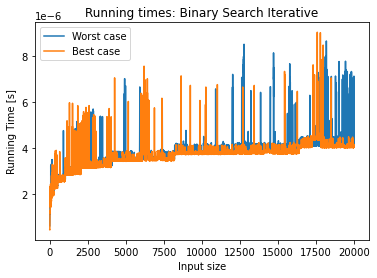

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel('Input size')
ax.set_ylabel('Running Time [s]')
ax.set_title('Running times: Binary Search Iterative')
plt.plot(x_binary_worst, y_binary_worst, label='Worst case')
plt.plot(x_binary_best, y_binary_best, label='Best case')

plt.legend()
plt.show()